<a href="https://colab.research.google.com/github/jieunlee-hi/Portfolio/blob/main/1_%EC%88%98%EC%A7%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 2022 유망 업종 데이터 수집

* html 파일 수집하기
    * pd.read_html(url)
* 결측 데이터 제거하기(axis 0:행, 1:열)
    * dropna(how="all")  : 모든 값이 전부 NaN인 행만 제거
    * dropna(subset=[''])  : 해당 컬럼값이 NaN인 행만 제거 
* 데이터 프레임 합치기
    * pd.concat / pd.merge
* 업종별 거래량 / 거래대금 시각화
    * seaborn /matplotlib
* 파생변수 생성
    * datetime 이용하여 조회일자 컬럼생성
    * FinanceDataReader 사용하여 종목코드 컬럼생성
* 주가 정보 수집 함수 생성
    * for문 사용하여 필요 데이터 수집
* tqdm 사용
    * 오래 걸리는 작업의 진행 상태 표시
* 파일로 저장하기 
    * df.to_csv(file_name, index=False)
* 파일 읽어오기
    * pd.read_csv(file_name)

In [1]:
# 라이브러리 로드 : pandas, matplotlib.pyplot , numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = '/content/drive/MyDrive/NanumGothic.ttf' # 폰트 파일 이름, 디렉토리 주의
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)


##### 한글 적용

In [4]:
def get_font_family():
    import platform
    system_name = platform.system()
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null
        import matplotlib.font_manager as fm
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [5]:
font_family = get_font_family()

In [6]:
# 그래프 스타일,폰트,마이너스폰트 설정
plt.style.use("seaborn")
plt.rc("font", family=font_family)
plt.rc("axes", unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

##### 모든 업종코드 수집  
    - BeautifulSoup사용하여 웹크롤링
    - dictionary  업종명 : 업종코드 형태로 수집

In [7]:
# -*- coding:utf-8 -*-
import re
import time
import ssl
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
context = ssl._create_unverified_context()
#page = requests.get("https://finance.naver.com/sise/sise_group.naver?type=upjong",context=context)
result = urlopen("https://finance.naver.com/sise/sise_group.naver?type=upjong", context=context)
soup = bs(result.read(), "html.parser")

code_num=[]
code_name=[]
try :
    for td in soup('td'):  # td 안의
        for a in td('a'):  # a 태그 중에서
            name = a.get_text()  # 업종명 데이터 추출
            #print(name)
            time.sleep(0.2)
            cod = re.search('/sise/.*', a['href']).group(0)  # 필요부분추출후 그룹핑
            # 업종 url
            cod = str(cod)
            cod = re.sub(r'[^0-9]', '', cod)
            #
            #print(p)
            code_num.append(cod)
            code_name.append(name)
except:
    pass
#딕셔너리로 변환
dic = dict(zip(code_name, code_num))            
print(dic)

{'상업서비스와공급품': '324', '항공사': '305', '호텔,레스토랑,레저': '317', '생명보험': '330', '항공화물운송과물류': '326', '기계': '299', '다각화된소비자서비스': '339', '손해보험': '315', '에너지장비및서비스': '295', '섬유,의류,신발,호화품': '274', '철강': '304', '우주항공과국방': '284', '담배': '275', '건설': '279', '비철금속': '322', '조선': '291', '건축자재': '289', '자동차부품': '270', '출판': '314', '무역회사와판매업체': '334', '전기제품': '283', '전기장비': '306', '식품': '268', '복합기업': '276', '식품과기본식료품소매': '302', '다각화된통신서비스': '336', '교육서비스': '290', '방송과엔터테인먼트': '285', '핸드셋': '292', '증권': '321', '전자장비와기기': '282', '디스플레이장비및부품': '269', '가정용기기와용품': '298', '건강관리장비와용품': '281', '창업투자': '277', '인터넷과카탈로그소매': '308', '은행': '301', '건축제품': '320', '통신장비': '294', '가정용품': '297', '전기유틸리티': '325', '음료': '309', '무선통신서비스': '333', '해운사': '323', '가구': '303', '건강관리업체및서비스': '316', '포장재': '311', '전문소매': '328', '게임엔터테인먼트': '263', '백화점과일반상점': '264', '판매업체': '265', '광고': '310', '석유와가스': '313', '문구류': '332', 'IT서비스': '267', '컴퓨터와주변기기': '293', '기타': '25', '화장품': '266', '부동산': '280', '디스플레이패널': '327', '복합유틸리티': '331', '소프

#### 주요증권사가 뽑은 2022년 유망업종 수집

   - 반도체와반도체장비 / 자동차 / 자동차부품/ 방송과엔터테인먼트
   - 관련기사 : https://pbes.tistory.com/entry/%EC%A3%BC%EC%9A%94-%EC%A6%9D%EA%B6%8C%EC%82%AC%EA%B0%80-%EB%BD%91%EC%9D%80-2022%EB%85%84-%EC%9C%A0%EB%A7%9D-%EC%97%85%EC%A2%85-%EB%B0%8F-%EC%A2%85%EB%AA%A9%20import%20time

##### read_html을 통해 url에 해당하는 업종 데이터 수집

In [8]:
import time
#딕셔너리 key값 이용하여 value값 담기
data_frame=[dic['반도체와반도체장비'],dic['자동차'],dic['방송과엔터테인먼트']]

#테이블 데이터 담아줄 리스트 생성
table=[]
for i in data_frame:
    url = "https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no=" + str(i)
    print(url)
    time.sleep(0.3)
    
    # read_html을 통해 해당 업종을수집합니다.
    table1 = pd.read_html(url, encoding="cp949")
    table.append(table1)
    
#print(table)
print("수집완료")

https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no=278
https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no=273
https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no=285
수집완료


##### 수집데이터 형태 확인
   - 2차원 리스트

In [9]:
np.shape(table)

(3, 3)

##### 2차원 리스트를 1차원리스트로 변환

In [10]:
list1 = sum(table, [])

##### 수집데이터 형태 확인
   - 1차원으로 변환된것 확인 (4,3) -> (12,)

In [11]:
np.shape(list1)

(9,)

##### 원하는 데이터의 위치값 확인
   - 수집해야할 데이터들은 list1[2]/list1[5]/list1[8]에 존재한다

##### 업종구분을 위해 각 업종마다 업종명 컬럼 생성

In [12]:
list1[2]['업종명']='반도체와반도체장비'
list1[5]['업종명']='자동차'
list1[8]['업종명']='방송과엔터테인먼트'

In [13]:
list1[2] #반도체와반도체장비

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,토론실,Unnamed: 10,Unnamed: 11,업종명
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,반도체와반도체장비
1,WI *,1140.0,234.0,+25.83%,1135.0,1140.0,9171446.0,10065.0,231771.0,NaN,NaN,NaN,반도체와반도체장비
2,코디엠 *,440.0,41.0,+10.28%,439.0,440.0,8260735.0,3770.0,3424918.0,NaN,NaN,NaN,반도체와반도체장비
3,에스앤에스텍 *,24250.0,1650.0,+7.30%,24250.0,24300.0,535243.0,12907.0,117016.0,NaN,NaN,NaN,반도체와반도체장비
4,타이거일렉 *,23300.0,1550.0,+7.13%,23200.0,23300.0,67349.0,1569.0,22208.0,NaN,NaN,NaN,반도체와반도체장비
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,엔투텍 *,1020.0,30.0,-2.86%,1020.0,1025.0,1513285.0,1580.0,778066.0,NaN,NaN,NaN,반도체와반도체장비
133,솔브레인 *,197500.0,6000.0,-2.95%,197300.0,197500.0,37710.0,7495.0,16701.0,NaN,NaN,NaN,반도체와반도체장비
134,리노공업 *,132300.0,5700.0,-4.13%,132200.0,132300.0,50873.0,6823.0,48602.0,NaN,NaN,NaN,반도체와반도체장비
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,반도체와반도체장비


##### 결측치를 제거
   - dropna사용
    * 모든 값이 전부 NaN인 행만 제거 (how='all') 
    * 해당 컬럼값이 NaN인 행만 제거 subset=['']


In [14]:
table_data = []
#원하는 데이터의 위치값 list1[2]/list1[5]/list1[8]
for i in range(2, 11, 3):
    data = list1[i]
    #전부 결측치 일때 제거 (how='all') 
    data = data.dropna(axis=1, how="all")
    table_data.append(data)
    
naver_raw = pd.concat(table_data, axis=0, ignore_index=False)
naver_raw=naver_raw.dropna(subset=['종목명'])
print("결측치 제거 완료")

결측치 제거 완료


#### 네이버에서 수집된 업종 데이터 확인

In [15]:
naver_raw.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,업종명
1,WI *,1140.0,234.0,+25.83%,1135.0,1140.0,9171446.0,10065.0,231771.0,반도체와반도체장비
2,코디엠 *,440.0,41.0,+10.28%,439.0,440.0,8260735.0,3770.0,3424918.0,반도체와반도체장비
3,에스앤에스텍 *,24250.0,1650.0,+7.30%,24250.0,24300.0,535243.0,12907.0,117016.0,반도체와반도체장비
4,타이거일렉 *,23300.0,1550.0,+7.13%,23200.0,23300.0,67349.0,1569.0,22208.0,반도체와반도체장비
5,아진엑스텍 *,11500.0,750.0,+6.98%,11450.0,11500.0,245178.0,2745.0,235945.0,반도체와반도체장비


##### 업종별 갯수 확인

In [16]:
naver_raw['업종명'].value_counts()

반도체와반도체장비    134
방송과엔터테인먼트     55
자동차            9
Name: 업종명, dtype: int64

##### 수집한 업종데이터 갯수 시각화

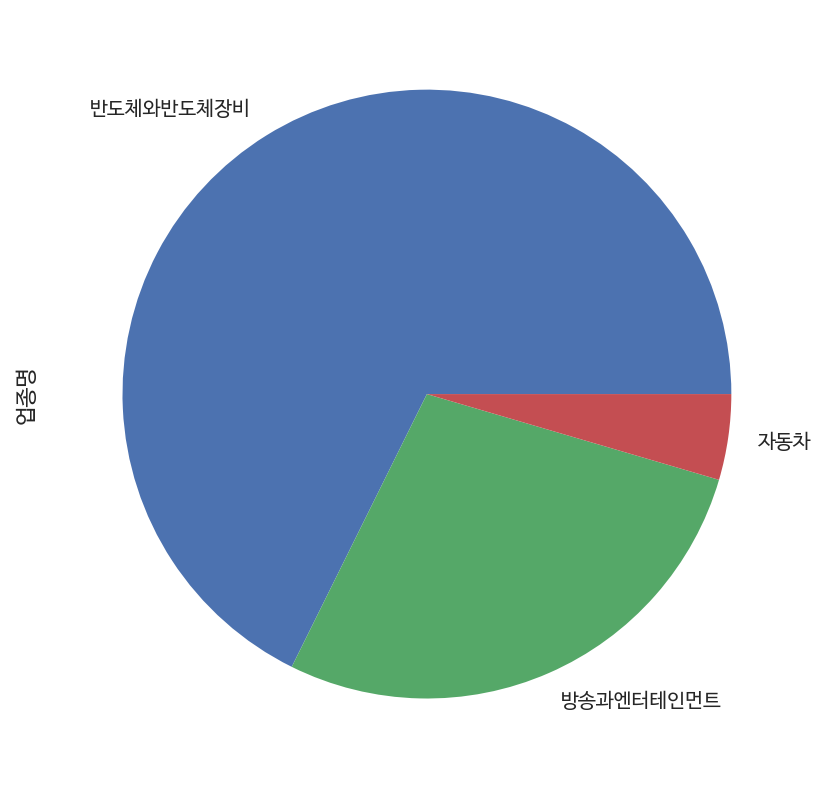

In [17]:
naver_raw['업종명'].value_counts(normalize=True).plot.pie(figsize=(7,7))

##### 파생변수 - 조회일자 생성
  * datetime을 이용 오늘일자 출력

In [18]:
import datetime
today = datetime.datetime.today()
today = today.strftime("%Y-%m-%d")
today

'2022-09-20'

##### 조회일자 컬럼 생성  후 확인

In [19]:
naver_raw["조회일자"] = today
naver_raw.tail()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,업종명,조회일자
51,티와이홀딩스,14600.0,100.0,-0.68%,14550.0,14600.0,31751.0,462.0,63460.0,방송과엔터테인먼트,2022-09-20
52,와이지엔터테인먼트 *,51900.0,600.0,-1.14%,51900.0,52000.0,299066.0,15631.0,395513.0,방송과엔터테인먼트,2022-09-20
53,코퍼스코리아 *,2150.0,30.0,-1.38%,2150.0,2170.0,175773.0,382.0,74907.0,방송과엔터테인먼트,2022-09-20
54,콘텐트리중앙,34000.0,650.0,-1.88%,34000.0,34100.0,142798.0,4891.0,174374.0,방송과엔터테인먼트,2022-09-20
55,스튜디오산타클로스 *,7160.0,200.0,-2.72%,7140.0,7160.0,98701.0,715.0,81067.0,방송과엔터테인먼트,2022-09-20


##### 거래량과 거래대금 시각화

##### 업종별 거래량 평균

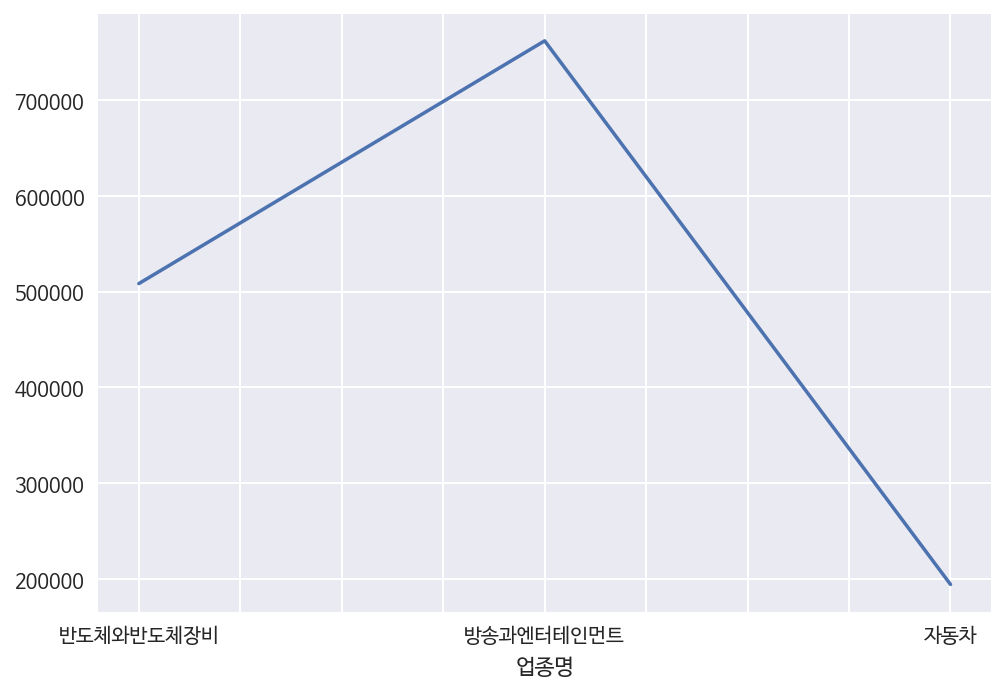

In [20]:
naver_raw.groupby(['업종명'])["거래량"].mean().plot()

업종별 거래량 TOP 5 종목

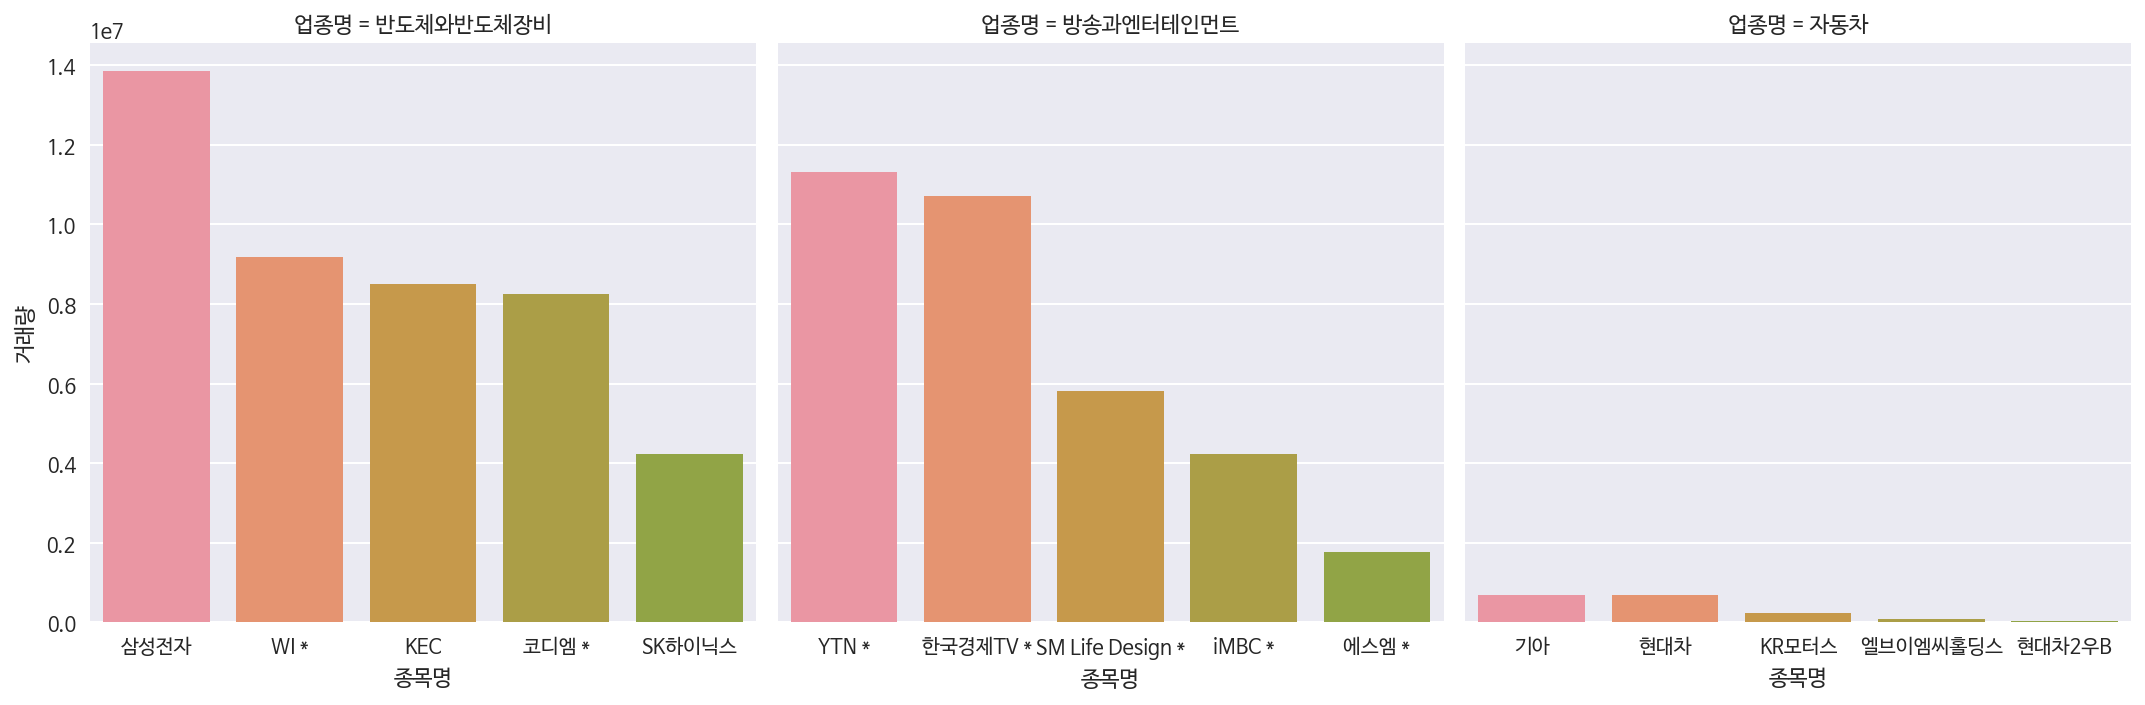

In [21]:
# catplot을 사용하여 서브프롯을 그린다.
sns.catplot(data=naver_raw.sort_values(by="거래량", ascending=False).groupby("업종명").head(5),
            x="종목명", y="거래량", kind="bar", col="업종명", col_wrap=3,sharex=False)

업종별 거래대금 평균

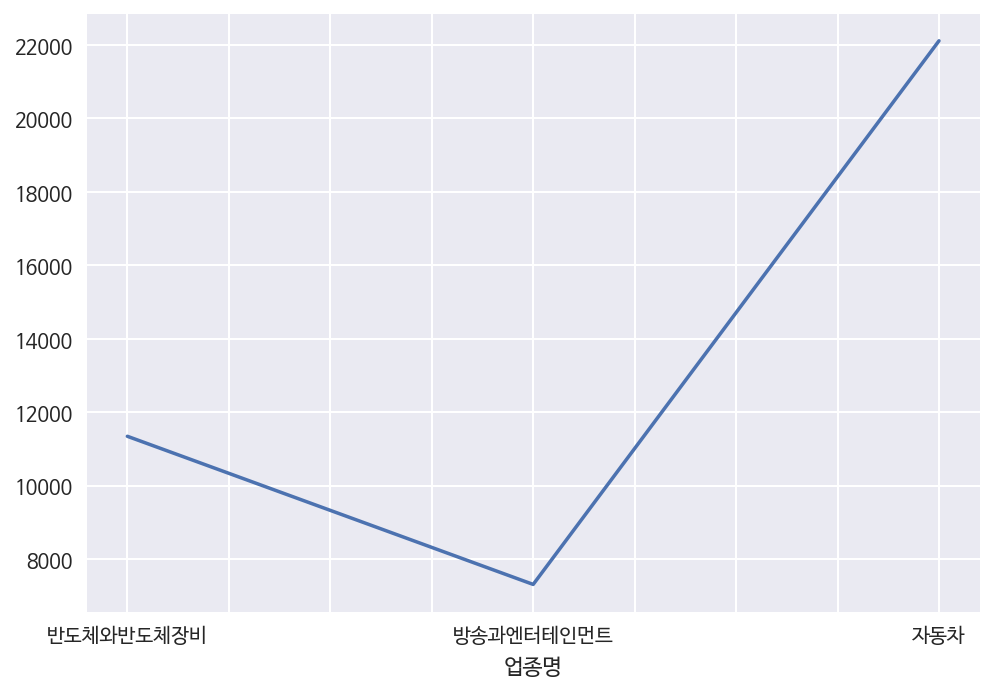

In [48]:
ax = plt.figure().gca()
naver_raw.groupby(["업종명"])["거래대금"].mean().plot()

업종별 거래대금 TOP 5 종목 

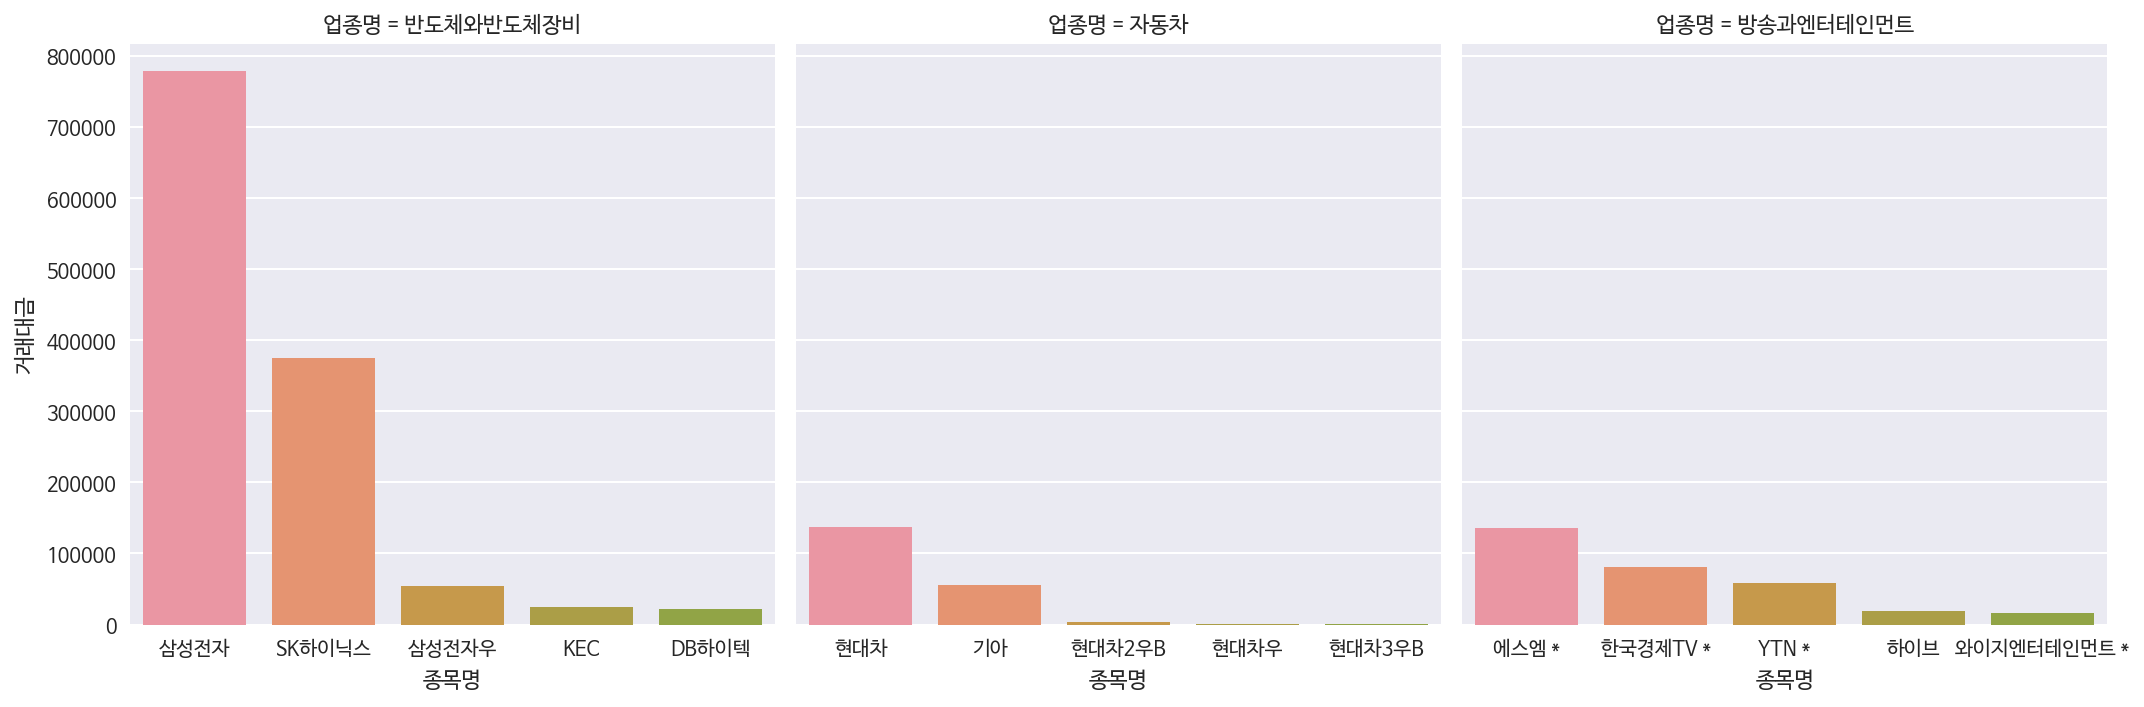

In [23]:
# catplot을 사용하여 서브프롯을 그린다.
sns.catplot(data=naver_raw.sort_values(by="거래대금", ascending=False).groupby("업종명").head(5),
            x="종목명", y="거래대금", kind="bar", col="업종명", col_wrap=3,sharex=False)

#### 종목코드 병합
   * finance-datareader 라이브러리 이용하여 거래소별 전체 종목 코드와 가격 데이터 수집
   * 관련 자료 :https://financedata.github.io/posts/finance-data-reader-users-guide.html

##### finance-datareader설치

In [24]:
!pip --trusted-host pypi.org --trusted-host files.pythonhosted.org install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
# 한국거래소 상장종목 전체 수집
import FinanceDataReader as fdr
krx = fdr.StockListing("KRX")
krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


##### 기존 네이버 데이터 종목명의 ' * '  제거한 종목명_전처리 컬럼생성
   - ex) 라온테크 * -> 라온테크

In [26]:
# 기존 종목명에는 * 표시가 있기 때문에 * 문자를 제거해서 "종목명_전처리"라는 새로운 컬럼에 담아줍니다.
naver_raw["종목명_전처리"] = naver_raw["종목명"].str.replace("*", "")
naver_raw["종목명_전처리"] = naver_raw["종목명_전처리"].str.strip()

In [27]:
#전처리 확인
naver_raw[["종목명", "종목명_전처리"]].head()

,종목명,종목명_전처리
1,WI *,WI
2,코디엠 *,코디엠
3,에스앤에스텍 *,에스앤에스텍
4,타이거일렉 *,타이거일렉
5,아진엑스텍 *,아진엑스텍


#####  종목코드 만들기
  * merge 이용
  * KRX데이터 중 Symbol, Name 만 사용
  * Symbol => 종목코드, Name => 종목명 로 변경

In [28]:
krx_data= krx[["Symbol", "Name"]]
krx_data.columns = ["종목코드", "종목명_전처리"]
krx_data.head()

,종목코드,종목명_전처리
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [29]:
# 종목명 컬럼을 기준으로 krx_data 데이터프레임과 병합합니다.
df = naver_raw.merge(krx_data, on="종목명_전처리", how='left')
df.shape

(198, 13)

In [30]:
# 병합 확인
df.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,업종명,조회일자,종목명_전처리,종목코드
0,WI *,1140.0,234.0,+25.83%,1135.0,1140.0,9171446.0,10065.0,231771.0,반도체와반도체장비,2022-09-20,WI,073570
1,코디엠 *,440.0,41.0,+10.28%,439.0,440.0,8260735.0,3770.0,3424918.0,반도체와반도체장비,2022-09-20,코디엠,224060
2,에스앤에스텍 *,24250.0,1650.0,+7.30%,24250.0,24300.0,535243.0,12907.0,117016.0,반도체와반도체장비,2022-09-20,에스앤에스텍,101490
3,타이거일렉 *,23300.0,1550.0,+7.13%,23200.0,23300.0,67349.0,1569.0,22208.0,반도체와반도체장비,2022-09-20,타이거일렉,219130
4,아진엑스텍 *,11500.0,750.0,+6.98%,11450.0,11500.0,245178.0,2745.0,235945.0,반도체와반도체장비,2022-09-20,아진엑스텍,059120


In [31]:
#결측값 확인
df.isnull().sum()

종목명        0
현재가        0
전일비        0
등락률        0
매수호가       0
매도호가       0
거래량        0
거래대금       0
전일거래량      0
업종명        0
조회일자       0
종목명_전처리    0
종목코드       0
dtype: int64

#### 종목상세정보 수집
  - '종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)','외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저','추정PERlEPS', '동일업종 PER', '동일업종 등락률', '배당수익률'

##### 주가 정보 수집 함수 생성

In [32]:
# 데이터프레임 형태로  든 종목코드의 주가 정보를 추출합니다.
import time
def get_item_info(finance_code):
    finance_url = f"https://finance.naver.com/item/main.nhn?code={finance_code}"
    tables = pd.read_html(finance_url, encoding="cp949")
    # 수집한 정보를 item_info에 list 형태로 관리합니다.
    item_info = []
    # 가장 최근의 주요재무정보를 가져와서 item_info 라는 변수에 담습니다.
    finance_info = tables[3].iloc[:, [0, -1]]
    finance_info.columns = [0, 1]
    item_info.append(finance_info)
    # tables을 반복문으로 돌며 컬럼의 수가 2인 테이블만 따로 추출해 
    # 위에서 만든 item_info 에 리스트 형태로 추가합니다.
    for t in tables:
        if t.shape[1] == 2:
            item_info.append(t)
    # concat을 이용하여 item_info를 하나의 DataFrame으로 만듭니다.
    finance_df = pd.concat(item_info)
    #transpose를 통해 행과 열의 위치를 변경
    finance_df = finance_df.set_index(0).transpose()
    time.sleep(0.2)
    return finance_df

In [33]:
# 정상출력 확인
## 예시 : 현대차 005380
finance_code='005380'
get_item_info(finance_code)

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2022.06),추정PERlEPS,PBRlBPS (2022.06),배당수익률l2021.12,동일업종 PER,동일업종 등락률
1,344744.0,27263.0,22429.0,7.91,6.51,NaN,NaN,NaN,NaN,8161.0,...,61852485,28.95%,"4.00매수 l 265,556","220,000 l 162,000","8.81배 l 22,538원","6.00배 l 31,247원","0.64배 l 312,476원",2.52%,6.75배,-1.02%


##### tqdm
   * total quality data management
   * 오래 걸리는 작업의 진행 상태 표시
   * 참고 :https://tqdm.github.io/

In [34]:
from tqdm.auto import tqdm
tqdm.pandas()

In [35]:
# 위에서 수집한 종목코드값을 get_item_info 함수에 적용
result = df["종목코드"].progress_apply(get_item_info)

  0%|          | 0/198 [00:00<?, ?it/s]

In [36]:
result

0      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
1      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
2      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
3      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
4      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
                             ...                        
193    0    매출액  영업이익  당기순이익 영업이익률   순이익률 ROE(지배주주) 부...
194    0     매출액   영업이익  당기순이익  영업이익률   순이익률 ROE(지배주주...
195    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
196    0     매출액   영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채...
197    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
Name: 종목코드, Length: 198, dtype: object

##### 수집한 종목마다의 정보를 하나의 데이터프레임화
* concat 사용

In [37]:
# result를 list로 만들고 concat을 통해 DataFrame으로 만듭니다.
# concat으로 데이터프레임을 합쳐줄때는 리스트 형태로 각 데이터프레임을 넣어주어야 합니다.
result_df = pd.concat(result.tolist())
result_df = result_df.reset_index()
result_df["종목코드"] = df["종목코드"]
del result_df["index"]

In [38]:
result_df.head()

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,동일업종 PER,동일업종 등락률,배당수익률l2021.12,PERlEPS(2021.12),PBRlBPS (2021.12),PERlEPS(2022.03),PBRlBPS (2022.03),PERlEPS(2021.09),PBRlBPS (2021.09),종목코드
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.35배,-1.10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,073570
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.35배,-1.10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224060
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.35배,-1.10%,0.41%,NaN,NaN,NaN,NaN,NaN,NaN,101490
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.35배,-1.10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219130
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.35배,-1.10%,1.30%,NaN,NaN,NaN,NaN,NaN,NaN,059120


In [39]:
# 합쳐줄 해당 종목/테마 데이터프레임을 봅니다.
df.shape

(198, 13)

##### 업종/테마 목록과 종목 정보를 수집한 데이터프레임을 합치기
* merge 사용

In [40]:
df.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,업종명,조회일자,종목명_전처리,종목코드
0,WI *,1140.0,234.0,+25.83%,1135.0,1140.0,9171446.0,10065.0,231771.0,반도체와반도체장비,2022-09-20,WI,073570
1,코디엠 *,440.0,41.0,+10.28%,439.0,440.0,8260735.0,3770.0,3424918.0,반도체와반도체장비,2022-09-20,코디엠,224060
2,에스앤에스텍 *,24250.0,1650.0,+7.30%,24250.0,24300.0,535243.0,12907.0,117016.0,반도체와반도체장비,2022-09-20,에스앤에스텍,101490
3,타이거일렉 *,23300.0,1550.0,+7.13%,23200.0,23300.0,67349.0,1569.0,22208.0,반도체와반도체장비,2022-09-20,타이거일렉,219130
4,아진엑스텍 *,11500.0,750.0,+6.98%,11450.0,11500.0,245178.0,2745.0,235945.0,반도체와반도체장비,2022-09-20,아진엑스텍,059120


In [42]:
# "종목코드" 컬럼을 기준으로 merge
df_info = df.merge(result_df)

In [43]:
# df, df_item_info, df_info 확인
df.shape, result_df.shape, df_info.shape

((198, 13), (198, 39), (198, 51))

In [44]:
df_info.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,업종명,...,배당수익률,동일업종 PER,동일업종 등락률,배당수익률l2021.12,PERlEPS(2021.12),PBRlBPS (2021.12),PERlEPS(2022.03),PBRlBPS (2022.03),PERlEPS(2021.09),PBRlBPS (2021.09)
0,WI *,1140.0,234.0,+25.83%,1135.0,1140.0,9171446.0,10065.0,231771.0,반도체와반도체장비,...,NaN,7.35배,-1.10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,코디엠 *,440.0,41.0,+10.28%,439.0,440.0,8260735.0,3770.0,3424918.0,반도체와반도체장비,...,NaN,7.35배,-1.10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,에스앤에스텍 *,24250.0,1650.0,+7.30%,24250.0,24300.0,535243.0,12907.0,117016.0,반도체와반도체장비,...,NaN,7.35배,-1.10%,0.41%,NaN,NaN,NaN,NaN,NaN,NaN
3,타이거일렉 *,23300.0,1550.0,+7.13%,23200.0,23300.0,67349.0,1569.0,22208.0,반도체와반도체장비,...,NaN,7.35배,-1.10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,아진엑스텍 *,11500.0,750.0,+6.98%,11450.0,11500.0,245178.0,2745.0,235945.0,반도체와반도체장비,...,NaN,7.35배,-1.10%,1.30%,NaN,NaN,NaN,NaN,NaN,NaN


#### 파일 만들기

In [45]:
# 파일 이름 데이터수집일자
# file_name
file_name = f"{today}.csv"
file_name

'2022-09-20.csv'

In [46]:
# csv 파일로 저장
df_info.to_csv(file_name, index=False)

In [47]:
pd.read_csv(file_name)

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,업종명,...,배당수익률,동일업종 PER,동일업종 등락률,배당수익률l2021.12,PERlEPS(2021.12),PBRlBPS (2021.12),PERlEPS(2022.03),PBRlBPS (2022.03),PERlEPS(2021.09),PBRlBPS (2021.09)
0,WI *,1140.0,234.0,+25.83%,1135.0,1140.0,9171446.0,10065.0,231771.0,반도체와반도체장비,...,NaN,7.35배,-1.10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,코디엠 *,440.0,41.0,+10.28%,439.0,440.0,8260735.0,3770.0,3424918.0,반도체와반도체장비,...,NaN,7.35배,-1.10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,에스앤에스텍 *,24250.0,1650.0,+7.30%,24250.0,24300.0,535243.0,12907.0,117016.0,반도체와반도체장비,...,NaN,7.35배,-1.10%,0.41%,NaN,NaN,NaN,NaN,NaN,NaN
3,타이거일렉 *,23300.0,1550.0,+7.13%,23200.0,23300.0,67349.0,1569.0,22208.0,반도체와반도체장비,...,NaN,7.35배,-1.10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,아진엑스텍 *,11500.0,750.0,+6.98%,11450.0,11500.0,245178.0,2745.0,235945.0,반도체와반도체장비,...,NaN,7.35배,-1.10%,1.30%,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,티와이홀딩스,14600.0,100.0,-0.68%,14550.0,14600.0,31751.0,462.0,63460.0,방송과엔터테인먼트,...,NaN,31.95배,+1.39%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,와이지엔터테인먼트 *,51900.0,600.0,-1.14%,51900.0,52000.0,299066.0,15631.0,395513.0,방송과엔터테인먼트,...,NaN,31.95배,+1.39%,0.48%,NaN,NaN,NaN,NaN,NaN,NaN
195,코퍼스코리아 *,2150.0,30.0,-1.38%,2150.0,2170.0,175773.0,382.0,74907.0,방송과엔터테인먼트,...,NaN,31.95배,+1.39%,0.70%,NaN,NaN,NaN,NaN,NaN,NaN
196,콘텐트리중앙,34000.0,650.0,-1.88%,34000.0,34100.0,142798.0,4891.0,174374.0,방송과엔터테인먼트,...,NaN,31.95배,+1.39%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
